# 📊 Data Analyst Agent

This notebook allows uploading a document (CSV, XLSX, PDF, DOCX, TXT, or image), performs data analysis, enables Q&A, and generates visualizations using the `meta-llama/Llama-4-Maverick-17B-128E-Instruct-FP8` model via Together.ai.

The Data Analyst Agent is a powerful tool designed to assist users in analyzing various file formats, including `.csv`, `.xlsx`, `.pdf`, `.txt`, `.docx`, and image files. Leveraging the capabilities of the `meta-llama/Llama-4-Maverick-17B-128E-Instruct-FP8` model from Together.ai, this agent can:

- Analyze tabular data and generate insightful visualizations.
- Extract text from different file types for further analysis.
- Provide intelligent question answering, including follow-up queries.

# Install and import libraries 

In [ ]:
%pip install pandas numpy matplotlib seaborn plotly openpyxl python-docx pytesseract pdfplumber fitz pillow together


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import os
import fitz  # PyMuPDF
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pdfplumber
from docx import Document
import together
import io

## Setting Together API 

In [17]:

together.api_key = "your-api-key"  # Ensure the API key is set as an environment variable
model_name = "meta-llama/Llama-4-Maverick-17B-128E-Instruct-FP8"


## Extraction of csv, xlsx, docx, pdf, or image

In [18]:

def extract_text_from_pdf(file_path):
    try:
        text = ""
        with pdfplumber.open(file_path) as pdf:
            for page in pdf.pages:
                page_text = page.extract_text()
                if page_text:
                    text += page_text + "\n"
        return text
    except Exception as e:
        print(f"❌ Error reading PDF: {e}")
        return ""




def extract_text_from_docx(file_path):
    try:
        doc = Document(file_path)
        return "\n".join([para.text for para in doc.paragraphs])
    except Exception as e:
        print(f"❌ Error reading DOCX: {e}")
        return ""



def extract_text_from_image(file_path):
    try:
        return pytesseract.image_to_string(Image.open(file_path))
    except Exception as e:
        print(f"❌ Error reading Image: {e}")
        return ""


def parse_file(file_path):
    ext = os.path.splitext(file_path)[-1].lower()
    print(f"📂 Parsing file: {file_path}")

    try:
        if ext == ".csv":
            df = pd.read_csv(file_path)
            return df, None
        elif ext == ".xlsx":
            df = pd.read_excel(file_path)
            return df, None
        elif ext == ".pdf":
            return None, extract_text_from_pdf(file_path)
        elif ext == ".docx":
            return None, extract_text_from_docx(file_path)
        elif ext in [".png", ".jpg", ".jpeg"]:
            return None, extract_text_from_image(file_path)
        elif ext == ".txt":
            with open(file_path, 'r', encoding='utf-8') as f:
                return None, f.read()
        else:
            raise ValueError(f"Unsupported file type: {ext}")
    except Exception as e:
        print(f"❌ Failed to parse file: {e}")
        return None, ""



## Interaction with Llama 

In [ ]:
def query_llama(prompt):
    response = together.Complete.create(
        prompt=prompt,
        model=model_name,
        max_tokens=10808800,
        temperature=0.7,
        top_k=50,
        top_p=0.7,
        repetition_penalty=1.1,
    )
    
    if 'choices' in response and len(response['choices']) > 0:
        return response['choices'][0]['text'].strip()
    else:
        return "Error: No output returned. Check your API call."


## Data analysis Function : gives details about shape, missing values, description, and histograms of all parameters

In [33]:

def analyze_data(df):
    print("Shape:", df.shape)
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nDescriptive Stats:")
    print(df.describe(include='all'))

    # Basic visual
    df.hist(bins=20, figsize=(15, 10))
    plt.tight_layout()
    plt.show()

# Implementation of the program and uploading the file

📂 Parsing file: C:\Users\Karthik\Downloads\data_analysis\Premier_league.csv
🟢 Detected tabular data.
Shape: (380, 39)

Missing Values:
date                0
clock               0
stadium             0
attendance          0
Home Team           0
Goals Home          0
Away Team           0
Away Goals          0
home_possessions    0
away_possessions    0
home_shots          0
away_shots          0
home_on             0
away_on             0
home_off            0
away_off            0
home_blocked        0
away_blocked        0
home_pass           0
away_pass           0
home_chances        0
away_chances        0
home_corners        0
away_corners        0
home_offside        0
away_offside        0
home_tackles        0
away_tackles        0
home_duels          0
away_duels          0
home_saves          0
away_saves          0
home_fouls          0
away_fouls          0
home_yellow         0
away_yellow         0
home_red            0
away_red            0
links               0
dtype: 

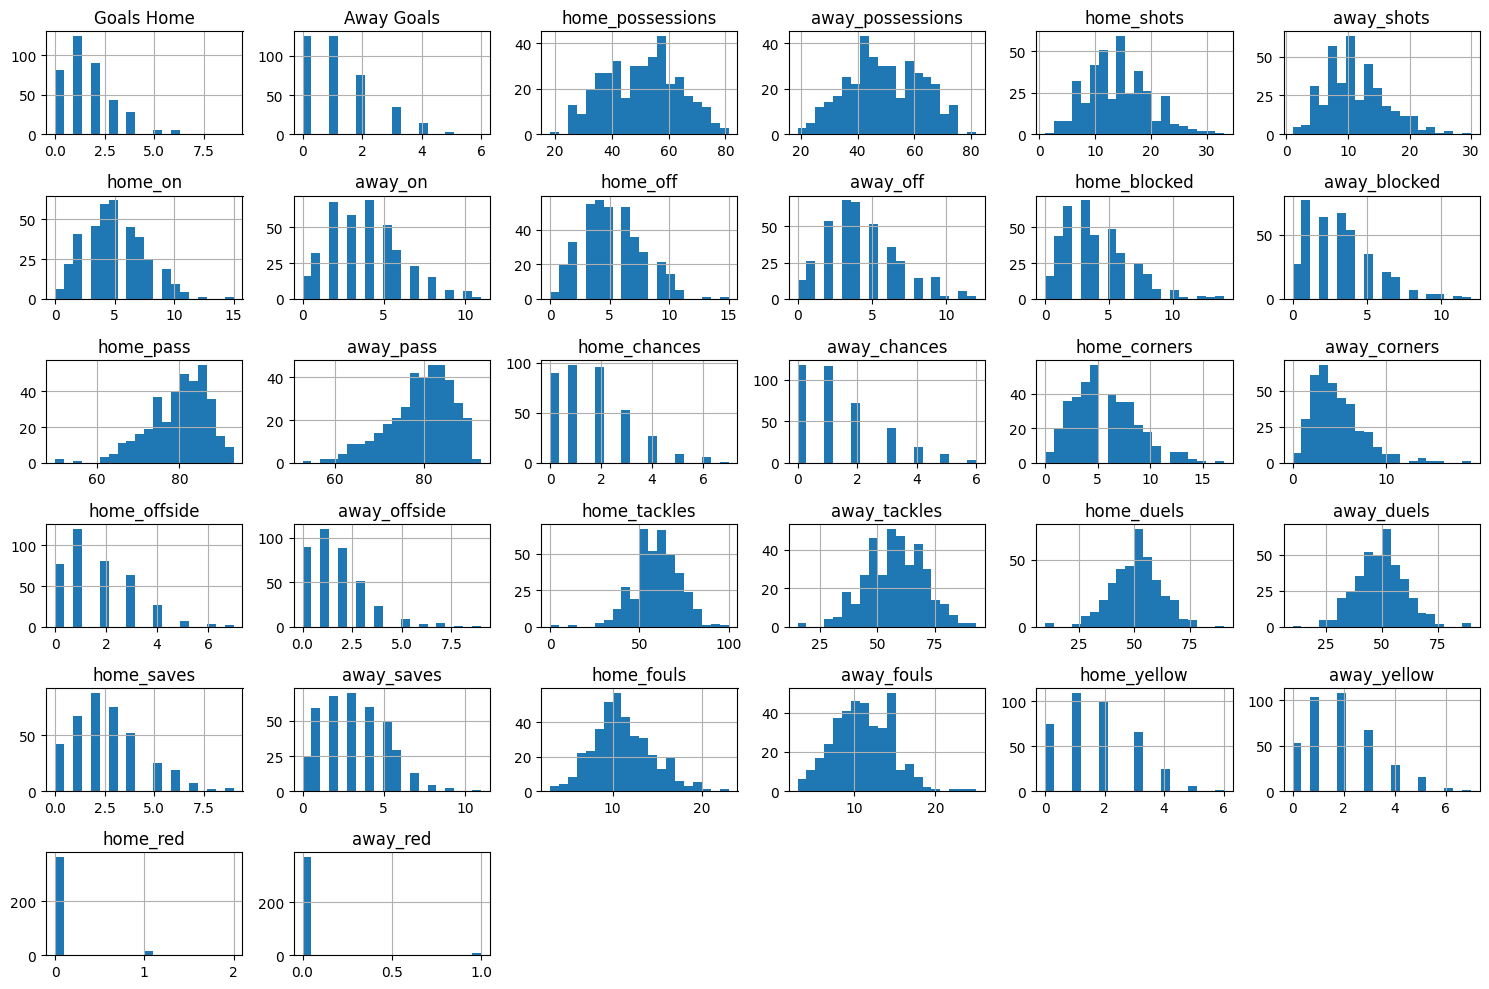

what can be predicted form the data and also give the appropriate algorithms that can be used 



C:\Users\Karthik\AppData\Local\Temp\ipykernel_21448\3702083594.py:2: DeprecationWarning: Call to deprecated function create.
  response = together.Complete.create(
c:\Users\Karthik\AppData\Local\Programs\Python\Python311\Lib\site-packages\together\legacy\complete.py:23: UserWarning: The use of together.api_key is deprecated and will be removed in the next major release. Please set the TOGETHER_API_KEY environment variable instead.
  warnings.warn(API_KEY_WARNING)


🧠 Response from LLaMA Model:
 Based on the provided football match dataset, several predictions can be made using various machine learning algorithms. Here are some potential predictions and corresponding algorithms:

### Predictions:
1. **Match Outcome (Win/Loss/Draw):** Predict whether a team will win, lose, or draw a match.
2. **Number of Goals Scored:** Forecast how many goals a team is likely to score in a future match.
3. **Possession Percentage:** Estimate the possession percentage for teams in an upcoming match.

### Algorithms for Match Outcome Prediction:
- **Logistic Regression:** Useful for binary classification problems like predicting a win or loss. For multi-class scenarios (win/draw/loss), it can be adapted using one-vs-rest or one-vs-all strategies.
- **Random Forest Classifier:** An ensemble method capable of handling multiple features and providing good accuracy for complex datasets.
- **Gradient Boosting Machines (GBM):** Another powerful ensemble technique known fo

In [39]:
file_path = "C:\\Users\\Karthik\\Downloads\\data_analysis\\Premier_league.csv"
df, text = parse_file(file_path)

if df is not None:
    print("🟢 Detected tabular data.")
    analyze_data(df)
    
   
    user_question = input("What would you like to ask about the data? ") 
    print(user_question ,"\n")
    context = df.head().to_string()  

    final_prompt = f"Answer the following question based on the content below:\n\n{context}\n\nQuestion: {user_question}\n\nAnswer:"
    response = query_llama(final_prompt)
    print("🧠 Response from LLaMA Model:\n", response)

elif text:
    print("🟢 Extracted text from file.")
    print(text[:1000]) 
else:
    print("❌ Could not extract content.")


In [41]:
file_path = "C:\\Users\\Karthik\\Downloads\\data_analysis\\SVD.jpg"
df, text = parse_file(file_path)

if df is not None:
    print("🟢 Detected tabular data.")
    analyze_data(df)
    
   
    user_question = input("What would you like to ask about the data? ") 
    print(user_question ,"\n")
    context = df.head().to_string()  

    final_prompt = f"Answer the following question based on the content below:\n\n{context}\n\nQuestion: {user_question}\n\nAnswer:"
    response = query_llama(final_prompt)
    print("🧠 Response from LLaMA Model:\n", response)

elif text:
    print("🟢 Extracted text from file.")
    print(text[:1000]) 
else:
    print("❌ Could not extract content.")


📂 Parsing file: C:\Users\Karthik\Downloads\data_analysis\SVD.jpg
❌ Error reading Image: tesseract is not installed or it's not in your PATH. See README file for more information.
❌ Could not extract content.
